# 텍스트 마이닝 첫걸음
비정형 데이터는 정해진 형태가 없고 연산이 불가능한 형태의 상태의 데이터를 의미합니다. 이미지 데이터나 음성 데이터를 예로 들 수 있으며, 가장 대표적인 것은 텍스트 데이터입니다. 그리고 이로부터 유의미한 정보를 추출하는 데이터 분석 기법을 **'텍스트 마이닝'**이라고 합니다.

### * 이 장의 핵심개념
- **웹 크롤링**으로 데이터를 수집합니다.
- **키워드 추출의 방법**을 알아봅니다.
- 키워드 간의 **연관 관계를 분석**합니다.
- 텍스트 분석 결과를 **시각화**합니다.

## 웹 크롤링으로 기초 데이터 수집하기
'나무위키 최근 변경 페이지'의 텍스트 데이터를 **웹 크롤링(web crawling)** 으로 수집한 다음, 데이터 내에서 등장한 키워드의 출현 빈도를 분석해보겠습니다. 이를 통해 우리는 나무위키 페이지에서 현재 가장 핫한 키워드가 무엇인지 분석할 수 있습니다.

웹 크롤링 혹은 웹 스크래핑은 인터넷에 있는 웹 페이지를 방문해서 페이지의 자료를 자동으로 수집하는 작업을 의미합니다.

### 1. 웹 크롤링 라이브러리 사용하기
파이썬에서는 **BeautifulSoup** 과 **requests** 라는 라이브러리로 웹 크롤러를 만들 수 있습니다.
- BeautifulSoup: HTML 문서에서 데이터를 추출하는 작업을 수행합니다.
- requests: HTML 문서를 가져오는 작업을 수행합니다.

In [1]:
!pip install lxml beautifulsoup4 requests

다음 코드에서는 **requests.get()** 함수로 url 의 HTML 문서를 가져온 뒤, 이를 **BeautifulSoup()** 클래스의 soup 객체로 반환합니다. 

그리고 **find(), find_all()** 함수를 사용하여 특정 HTML 태그 혹은 특정 HTML 클래스를 가진 데이터를 가져옵니다.

In [2]:
import requests
from bs4 import BeautifulSoup
import re

# 크롤링할 사이트 정의
source_url = 'https://namu.wiki/RecentChanges'

# 사이트의 HTML 구조에 기반하여 크롤링 수행
req = requests.get(source_url)
html = req.content
soup = BeautifulSoup(html, 'lxml')
contents_table = soup.find(name='table')
table_body = contents_table.find(name='tbody')
table_rows = table_body.find_all(name='tr')

# a 태그의 href 속성(페이지 링크)을 리스트로 추출, 크롤링할 페이지 리스트를 생성
page_url_base = 'https://namu.wiki'
page_urls = []
for index in range(0, len(table_rows)):
    first_td = table_rows[index].find_all('td')[0]
    td_url = first_td.find_all('a')
    if len(td_url) > 0:
        page_url = page_url_base + td_url[0].get('href')
        page_urls.append(page_url)

# 중복 url 를 제거합니다.
page_urls = list(set(page_urls))
for page in page_urls[:5]:
    print(page)

https://namu.wiki/w/%EB%AA%AC%EC%8A%A4%ED%84%B0%20%EB%B3%B4%EC%9D%B4%EC%99%80%20%EC%A0%80%EC%A3%BC%EB%B0%9B%EC%9D%80%20%EC%99%95%EA%B5%AD
https://namu.wiki/w/%ED%8C%8C%EC%9D%BC:%EB%82%B4%EB%B0%A9%EC%97%AD1.jpg
https://namu.wiki/w/%EC%95%88%EB%8F%84%20%EB%A7%88%EC%82%AC%ED%9E%88%EB%A1%9C(1967)
https://namu.wiki/w/%ED%8C%8C%EC%9D%BC:nBTfSXq.png
https://namu.wiki/w/%EB%B0%9C%EB%A1%9C%EB%9E%80%ED%8A%B8%20%ED%8D%BC%EC%8A%A4%ED%8A%B8%20%EC%8A%A4%ED%8A%B8%EB%9D%BC%EC%9D%B4%ED%81%AC%20%EC%BD%94%EB%A6%AC%EC%95%84


### 2. 텍스트 정보 수집하기

이번에는 **text 함수**만을 사용하여 태그의 텍스트 정보만을 추출해보겠습니다.

In [3]:
req = requests.get(page_urls[0])
html = req.content
soup = BeautifulSoup(html, 'lxml')
title = soup.find(name='h1')
category = soup.find(name='div', attrs={'class':'wiki-paragraph'})
content_clearfix = soup.find(name='div', attrs={'class':'wiki-heading-content'})
print(title.text)
print(category.text)
print(content_clearfix.text)

몬스터 보이와 저주받은 왕국 
몬스터 보이와 저주받은 왕국Monster Boy and the Cursed Kingdom
세가의 원더보이 시리즈 신작이자 일곱번째 작품. [1]시리즈 전통 게임 플레이인 비선형 탐험으로 진행되며 원더보이: 드래곤즈 트랩의 동물 변신 시스템을 사용하여 왕국 곳곳에서 마법을 부려 소동을 피우는 나부 삼촌을 막고 머지않아 부활하는 악의 군주를 막는게 주된 이야기이다.


## [실습] 나무위키 최근 변경 페이지 키워드 분석하기

### step 1: 크롤링으로 웹 데이터 가져오기

**BeautifulSoup** 을 사용하여 웹 크롤링을 진행합니다.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import re

# 크롤링할 사이트 주소 정의
source_url = 'https://namu.wiki/RecentChanges'

# 사이트의 html 구조에 기반하여 크롤링을 수행
req = requests.get(source_url)
html = req.content
soup = BeautifulSoup(html, 'lxml')
contents_table = soup.find(name='table')
table_body = contents_table.find(name='tbody')
table_rows = table_body.find_all(name='tr')

# a 태그의 href 속성을 리스트로 추출, 크롤링할 페이지 리스트를 생성
page_url_base = 'https://namu.wiki'
page_urls = []
for index in range(0, len(table_rows)):
    first_td = table_rows[index].find_all('td')[0]
    td_url = first_td.find_all('a')
    if len(td_url) > 0:
        page_url = page_url_base + td_url[0].get('href')
        page_urls.append(page_url)

# 중복 url 를 제거함
page_urls = list(set(page_urls))

나무위키에서 최근 변경이 일어난 페이지들의 url 을 page_urls 라는 변수에 저장하고 중복된 url 을 제거합니다.

이제 이 주소들에 다시 한번 접근하여 문서의 본문과 제목, 그리고 카테고리에 등장하는 텍스트 데이터를 가져와봅니다.

In [5]:
columns = ['title', 'category', 'content_text']
df = pd.DataFrame(columns=columns)

for page_url in page_urls:
    req = requests.get(page_url)
    html = req.content
    soup = BeautifulSoup(html, 'lxml')
    title = soup.find(name='h1')
    category = soup.find(name='div', attrs={'class':'wiki-paragraph'})
    content_clearfix = soup.find(name='div', attrs={'class':'wiki-heading-content'})
    
    if title is not None:
        row_title = title.text.replace('\n', '')
    else:
        row_title = ''
        
    
    if category is not None:
        row_category = category.text.replace('\n', '')
    else:
        row_category = ''
        
    
    if content_clearfix is not None:
        row_content = content_clearfix.text.replace('\n', '')
    else:
        row_content = ''
        
        
    row = [row_title, row_category, row_content]
    series = pd.Series(row, index=df.columns)
    df = df.append(series, ignore_index=True)
    
df.head()

,title,category,content_text
0,몬스터 보이와 저주받은 왕국,몬스터 보이와 저주받은 왕국Monster Boy and the Cursed Kingdom,세가의 원더보이 시리즈 신작이자 일곱번째 작품. [1]시리즈 전통 게임 플레이인 비...
1,파일:내방역1.jpg,이 파일은 나무위키에서 제한된 한도 안에서 쓰입니다.본 이미지는 퍼블릭 도메인 혹은...,출처출처를 삽입해 주세요.날짜이미지가 만들어진 날짜를 삽입해 주세요.저작자이미지의 ...
2,안도 마사히로(1967),1. 개요2. 연출 샘플3. 참가 작품3.1. 감독3.2. 그 외,安藤真裕일본의 애니메이션 감독 및 애니메이터. 1967년 9월 1일생. (53세) ...
3,파일:nBTfSXq.png,이 파일은 나무위키에서 제한된 한도 안에서 쓰입니다.본 이미지는 퍼블릭 도메인 혹은...,출처http://timegarden.ivyro.net/날짜이미지가 만들어진 날짜를 ...
4,발로란트 퍼스트 스트라이크 코리아,발로란트 퍼스트 스트라이크 코리아VALORANT FIRST STRIKE KOREA,라이엇 게임즈가 주관하는 최초의 대규모 발로란트 e스포츠 대회빠른 바로가기(실시간 ...


(아니 근데... 빡치게 왜 자꾸 책에 있는 코드 내용이랑 실제 웹사이트 내용이랑 다르냐고..... 거의 나무위키 웹사이트 뜯어서 코드를 재창조 해내는 수준)

위의 실행 결과는 모든 url 의 텍스트 데이터를 가져온 뒤, 이를 데이터 프레임(표)의 형태로 변환한 것입니다. 불필요한 문자는 **replace** 함수를 사용해 제거합니다.

### step 2: 키워드 정보 추출하기


**(1) 텍스트 전처리 작업**

다음은 수집한 텍스트 데이터에서 키워드 정보를 추출하는 단계입니다. 이를 위해 **텍스트 전처리 작업**이 필요합니다. 텍스트 전처리는 특수문자나 외국어를 제거하는 등의 과정을 포함합니다. 그런데 이는 상황과 맥락에 따라 조금씩 다를 수 있습니다. 예를 들어 스팸 메일을 분류하는 텍스트 마이닝의 경우, 특수문자나 외국어가 중요한 힌트가 되기 때문에 이를 제거하지 않습니다. 반면, 키워드 분석처럼 '단어'를 추출하는 것이 목적이면 특정 언어의 글자만을 추출하기도 합니다.

파이썬에서는 **'re'라는 모듈을 통해 정규표현식을 사용**할 수 있습니다. 정규표현식은 특정한 규칙을 가진 문자열의 집합을 표현하는 방식입니다.

한글에 대한 정규표현식을 정의하면, 대상이 되는 텍스트 데이터에서 한글만 추출할 수 있게 됩니다.

In [6]:
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    result = hangul.sub('', text)
    return result

text_cleaning(df['content_text'][0])

'세가의 원더보이 시리즈 신작이자 일곱번째 작품 시리즈 전통 게임 플레이인 비선형 탐험으로 진행되며 원더보이 드래곤즈 트랩의 동물 변신 시스템을 사용하여 왕국 곳곳에서 마법을 부려 소동을 피우는 나부 삼촌을 막고 머지않아 부활하는 악의 군주를 막는게 주된 이야기이다'

In [7]:
# 각 피처마다 데이터 전처리를 적용합니다.
df['title'] = df['title'].apply(lambda x: text_cleaning(x))
df['category'] = df['category'].apply(lambda x: text_cleaning(x))
df['content_text'] = df['content_text'].apply(lambda x: text_cleaning(x))
df.head()

,title,category,content_text
0,몬스터 보이와 저주받은 왕국,몬스터 보이와 저주받은 왕국,세가의 원더보이 시리즈 신작이자 일곱번째 작품 시리즈 전통 게임 플레이인 비선형 탐...
1,파일내방역,이 파일은 나무위키에서 제한된 한도 안에서 쓰입니다본 이미지는 퍼블릭 도메인 혹은 ...,출처출처를 삽입해 주세요날짜이미지가 만들어진 날짜를 삽입해 주세요저작자이미지의 저작...
2,안도 마사히로,개요 연출 샘플 참가 작품 감독 그 외,일본의 애니메이션 감독 및 애니메이터 년 월 일생 세 홋카이도 출신격투 액션 전문 ...
3,파일,이 파일은 나무위키에서 제한된 한도 안에서 쓰입니다본 이미지는 퍼블릭 도메인 혹은 ...,출처날짜이미지가 만들어진 날짜를 삽입해 주세요저작자이미지의 저작자를 삽입해 주세요저...
4,발로란트 퍼스트 스트라이크 코리아,발로란트 퍼스트 스트라이크 코리아,라이엇 게임즈가 주관하는 최초의 대규모 발로란트 스포츠 대회빠른 바로가기실시간 방송...


다음 과정은 키워드를 추출한 뒤, 빈도 분석을 수행하는 과정입니다. 여기서 키워드를 추출한다는 것은 무엇을 의미할까요? **키워드 추출**이란 좁은 의미에서는 명사, 혹은 형태소 단위의 문자열을 추출하는 것입니다. 이를 수행하기 위해 **말뭉치**라는 것을 만들어야 합니다.


**말뭉치**는 말 그대로 텍스트 데이터의 뭉텅이를 의미합니다. 이번 예제에서는 제목 단위, 카테고리 단위, 본문 단위의 키워드를 분석하기 위해 제목 말뭉치, 카테고리 말뭉치, 본문 말뭉치 총 3개의 말뭉치를 생성합니다.

아래 코드는 텍스트 피처를 tolist() 로 추출한 뒤, join() 함수로 말뭉치를 생성한 것입니다.

In [8]:
title_corpus = "".join(df['title'].tolist())
category_corpus = "".join(df['category'].tolist())
content_corpus = "".join(df['content_text'].tolist())
title_corpus

'몬스터 보이와 저주받은 왕국 파일내방역 안도 마사히로 파일 발로란트 퍼스트 스트라이크 코리아 저승사자 고즈 야마구치 스스무 리온신비아파트 시리즈 컨토션 쥘 쿤데 이낙연비판 및 논란  안노 타카시 파일 대흥수정  파일 신흥 베논논란 및 사건사고 파일 마늘 아카이 토시후미 안유진 아키타야 노리아키 메가톤맨부 하나조노 타에 안도 마사오미 부정형 유아오마이걸 강우빈 와패니즈  적  내일은 미스트롯참가자 파일내방역 괴도신사 도로로도로로  올해의 팀 수원 삼성 블루윙즈년 김달수달수 이야기 더 킹 오브 파이터즈 시리즈 아카이 타카미 안노 히데아키  야나기사와 테츠야 애완돌 파일 스타 트렉 디스커버리 파일 히에이전함소녀 야마구치 유지 파일 파일 위장자던전 앤 파이터 워 썬더지상 병기소련 트리중전차   스페인계 멕시코인 파일총신총신 좀비고등학교세계관과 스토리 아인 달튼 가백문 채려 강서고등학교 아이자와 마사히로  오버드라이브 조성원 아카네 카즈키 글로리엠 담여울 구재희 김현미 파일 저스틴 로일랜드   쌍둥이   레그나스 왕자 히카와 아야메 파일 야나기 신스케 하스스톤카드일람결투 전용 강명영 묘도인 이츠키 고이도 유이 아오키 에이 파일 제대 국회 파일 딜란두 알바타우 수도권 광역급행철도 노선 외래어 표기법러시아어  하성운 공혁준논란 및 사건사고년 '

이제 각 말뭉치 안에서 등장하는 **형태소**를 추출하겠습니다. 파이썬의 한국어 형태소 추출 라이브러리 중, 가장 쉽게 사용할 수 있는 것은 **konlpy** 입니다.

In [9]:
from konlpy.tag import Okt
from collections import Counter

# 명사 단위의 키워드 추출하기
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(content_corpus)
count = Counter(nouns)
count

Counter({'가의': 1,
         '원더보이': 2,
         '시리즈': 29,
         '신작': 1,
         '이자': 12,
         '일곱': 1,
         '작품': 39,
         '전통': 4,
         '게임': 13,
         '플레이': 1,
         '비선형': 1,
         '탐험': 1,
         '진행': 6,
         '드래곤즈': 1,
         '트랩': 2,
         '동물': 1,
         '변신': 3,
         '시스템': 4,
         '사용': 4,
         '왕국': 2,
         '곳곳': 1,
         '마법': 4,
         '소동': 1,
         '나부': 1,
         '삼촌': 1,
         '머': 1,
         '부활': 2,
         '악의': 1,
         '군주': 1,
         '이야기': 2,
         '출처': 13,
         '삽입': 39,
         '날짜': 19,
         '이미지': 28,
         '저작자': 18,
         '저작권': 19,
         '관련': 10,
         '기타': 24,
         '정보': 20,
         '요기': 9,
         '일본': 17,
         '애니메이션': 29,
         '감독': 93,
         '및': 8,
         '애니메이터': 23,
         '년': 66,
         '월': 37,
         '일생': 3,
         '세': 10,
         '홋카이도': 1,
         '출신': 11,
         '격투': 3,
         '액션': 13,
         

본 실습에서는 한 글자 키워드를 제거하겠습니다.

In [10]:
remove_char_counter = Counter({x: count[x] for x in count if len(x) > 1})
remove_char_counter

Counter({'가의': 1,
         '원더보이': 2,
         '시리즈': 29,
         '신작': 1,
         '이자': 12,
         '일곱': 1,
         '작품': 39,
         '전통': 4,
         '게임': 13,
         '플레이': 1,
         '비선형': 1,
         '탐험': 1,
         '진행': 6,
         '드래곤즈': 1,
         '트랩': 2,
         '동물': 1,
         '변신': 3,
         '시스템': 4,
         '사용': 4,
         '왕국': 2,
         '곳곳': 1,
         '마법': 4,
         '소동': 1,
         '나부': 1,
         '삼촌': 1,
         '부활': 2,
         '악의': 1,
         '군주': 1,
         '이야기': 2,
         '출처': 13,
         '삽입': 39,
         '날짜': 19,
         '이미지': 28,
         '저작자': 18,
         '저작권': 19,
         '관련': 10,
         '기타': 24,
         '정보': 20,
         '요기': 9,
         '일본': 17,
         '애니메이션': 29,
         '감독': 93,
         '애니메이터': 23,
         '일생': 3,
         '홋카이도': 1,
         '출신': 11,
         '격투': 3,
         '액션': 13,
         '전문': 3,
         '액체': 1,
         '특유': 2,
         '연출': 33,
         '특징': 2,
      

이제 실질적인 의미가 없는 키워드를 처리합니다. 의미가 없는 키워드를 **불용어**라고 합니다. 텍스트 마이닝에서는 불용어를 분석 단계에서 제거하는 과정을 거칩니다.

이 단계에서 필요한 것이 **불용어 사전** 입니다. 다음 코드의 **stopwords 가 한국어의 약식 불용어 사전 예시**입니다. 이 불용어 사전에는 키워드로서의 의미를 가지지 않는 형태소들이 포함되어 있습니다.

In [11]:
korean_stopwords_path = './stopwords-ko.txt'

with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]
stopwords[:20]

['가',
 '가까스로',
 '가령',
 '각',
 '각각',
 '각자',
 '각종',
 '갖고말하자면',
 '같다',
 '같이',
 '개의치않고',
 '거니와',
 '거바',
 '거의',
 '것',
 '것과 같이',
 '것들',
 '게다가',
 '게우다',
 '겨우']

이후, **현재 분석 중인 나무위키 데이터에서만 적용되는 불용어도 추가해야합니다.** '상위', '문서', '내용'과 같은 단어를 불용어 사전에 추가해봅시다. 이 단어들은 나무위키 문서 페이지에서 많이 등장하지만, 특별한 의미를 가지지 않는 키워드입니다. 만약 이러한 불용어를 많이 추가하면 키워드 분석의 질을 높일 수 있을 것입니다.

In [12]:
namu_wiki_stopwords = ['상위', '삽입', '문서', '내용', '누설', '아래', '해당', '설명', '표기', '추가', '모든', '사용', '날짜', '감독', '출처', '년월', '년대', '활동', '연출', '매우', '가장', '줄거리', '이전', '문단', '당시', '주로',
                      '요소', '상황', '편집', '틀', '경우', '때문', '모습', '정도', '이후', '사실', '생각', '인물', '이름', '년', '월', '소속', '요기', '관련', '위해', '정보', '부분', '다년', '얼굴', '평가']

for stopword in namu_wiki_stopwords:
    stopwords.append(stopword)
    
remove_char_counter = Counter({x: remove_char_counter[x] for x in count if x not in stopwords})
remove_char_counter

Counter({'가의': 1,
         '원더보이': 2,
         '시리즈': 29,
         '신작': 1,
         '이자': 12,
         '작품': 39,
         '전통': 4,
         '게임': 13,
         '플레이': 1,
         '비선형': 1,
         '탐험': 1,
         '진행': 6,
         '드래곤즈': 1,
         '트랩': 2,
         '동물': 1,
         '변신': 3,
         '시스템': 4,
         '왕국': 2,
         '곳곳': 1,
         '마법': 4,
         '소동': 1,
         '나부': 1,
         '삼촌': 1,
         '머': 0,
         '부활': 2,
         '악의': 1,
         '군주': 1,
         '이야기': 2,
         '이미지': 28,
         '저작자': 18,
         '저작권': 19,
         '일본': 17,
         '애니메이션': 29,
         '애니메이터': 23,
         '일생': 3,
         '세': 0,
         '홋카이도': 1,
         '출신': 11,
         '격투': 3,
         '액션': 13,
         '전문': 3,
         '피': 0,
         '땀': 0,
         '침': 0,
         '액체': 1,
         '특유': 2,
         '씬': 0,
         '특징': 2,
         '팬': 0,
         '걸': 0,
         '안도': 1,
         '즙': 0,
         '크레용': 1,
         '신짱': 1,
    

### step 3: 워드 클라우드 시각화하기

지금까지 분석한 키워드를 시각화합니다. 키워드 빈도 분석에 가장 적합한 시각화 방법은 **워드 클라우드 기법**입니다. 파이썬에서는 여러 워드 클라우드 패키지를 제공하는데, 그 중에서 가장 널리 사용되는 **pytagcloud** 를 사용해보겠습니다. 

In [13]:
!pip install pytagcloud pygame simplejson

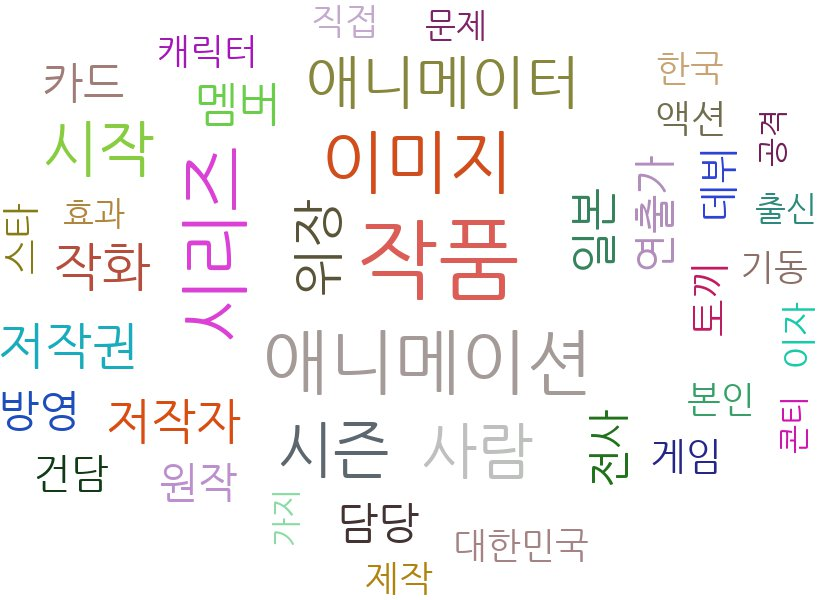

In [19]:
import random
import pytagcloud
import webbrowser

ranked_tags = remove_char_counter.most_common(40)
taglist = pytagcloud.make_tags(ranked_tags, maxsize=70)
pytagcloud.create_tag_image(taglist, 'wordcloud.jpg', size=(900, 600), fontname='NanumGothic-Regular', rectangular=False)

from IPython.display import Image
Image(filename='wordcloud.jpg')

해당 코드 실행 결과는 **본문 페이지의 키워드를 시각화**한 것입니다. 워드 클라우드는 등장 빈도가 잦을수록 워드의 크기를 크게 출력합니다.